In [1]:
% load_ext autoreload
% autoreload 2

In [2]:
import sys
sys.path.append('..')

In [3]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

from pylab import rcParams
plt.rcParams['figure.figsize'] = 10, 6

In [5]:
from src.algorithms import DAGMM
from src.algorithms import RecurrentEBM
from src.algorithms import Donut
from src.algorithms import LSTMAD
from src.datasets import SyntheticDataGenerator
from src.evaluation.evaluator import Evaluator

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


ToDo: define more synthetic datasets

In [6]:
datasets = [SyntheticDataGenerator.get_extreme1()]

ToDo: 
* DAGMM does not support fit-interface
* LSTMAD crashes python kernel

In [7]:
detectors = [RecurrentEBM(), Donut()]  # LSTMAD(), DAGMM()

In [8]:
eva = Evaluator(datasets, detectors)

ToDo: reduce output or suppress

In [9]:
eva.evaluate()

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:58<00:00,  1.70it/s]
 50% (1 of 2) |#############             | Elapsed Time: 0:01:02 ETA:   0:01:02

Trainable Parameters (58150 in total)
------------------------------------------------------
donut/p_x_given_z/mean/dense/bias    (120,)      120
donut/p_x_given_z/mean/dense/kernel  (100, 120)  12000
donut/p_x_given_z/std/dense/bias     (120,)      120
donut/p_x_given_z/std/dense/kernel   (100, 120)  12000
donut/q_z_given_x/mean/dense/bias    (5,)        5
donut/q_z_given_x/mean/dense/kernel  (100, 5)    500
donut/q_z_given_x/std/dense/bias     (5,)        5
donut/q_z_given_x/std/dense/kernel   (100, 5)    500
sequential/_0/dense/bias             (100,)      100
sequential/_0/dense/kernel           (5, 100)    500
sequential/_1/dense/bias             (100,)      100
sequential/_1/dense/kernel           (100, 100)  10000
sequential_1/_0/dense/bias           (100,)      100
sequential_1/_0/dense/kernel         (120, 100)  12000
sequential_1/_1/dense/bias           (100,)      100
sequential_1/_1/dense/kernel         (100, 100)  10000

[Epoch 10/256] Learning rate decreased to 0.00075
[E

INFO:tensorflow:Restoring parameters from C:\Users\axels\AppData\Local\Temp\tmp06gymtgu\variables.dat-700
100% (2 of 2) |##########################| Elapsed Time: 0:01:26 Time:  0:01:26
100% (1 of 1) |##########################| Elapsed Time: 0:01:27 Time:  0:01:27


In [10]:
eva.benchmarks()

..\src\evaluation\evaluator.py:33: RuntimeWarning: invalid value encountered in greater_equal
  return np.where(score >= threshold, 1, 0)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,accuracy,algorithm_mame,dataset_name,f1-score,precision,recall
0,0.860667,RecurrentEBM,extreme1,0.009479,0.004975,0.1
1,0.993333,Donut,extreme1,0.000000,0.000000,0.0


**ToDo: the following code should be merged into a suitable place.** e.g. Evaluator

In [3]:
def plot_DBESM_errors(X_test, pred):
    threshold_line = len(X_test) * [np.mean(pred) + 2*np.std(pred)]
    #plt.subplot(211)
    for col in X_test.columns:
        plt.plot(X_test[col], color="black")
    #plt.subplot(212)
    plt.plot(np.arange(len(pred)), [x/100 for x in pred])
    plt.plot([x/100 for x in threshold_line])
    plt.legend()
    plt.title('Reconstruction error DBESM')
    plt.show()

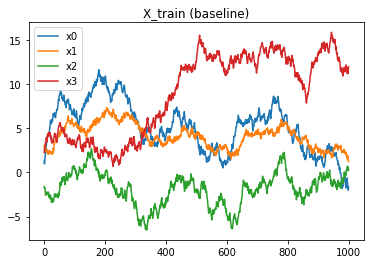

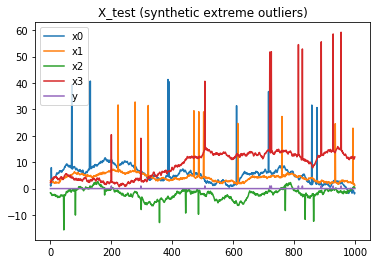

100%|██████████| 100/100 [01:31<00:00,  1.09it/s]


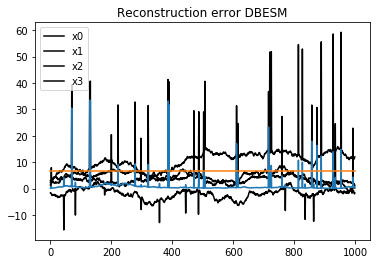

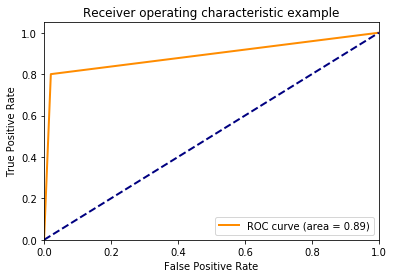

    name  accuracy  precision  recall  F1-score
0  ReEBM     0.978   0.285714     0.8  0.421053


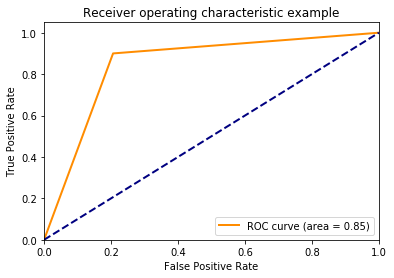

    name  accuracy  precision  recall  F1-score
0  DAGMM     0.795   0.042254     0.9  0.080717
Trainable Parameters (58150 in total)
------------------------------------------------------
donut/p_x_given_z/mean/dense/bias    (120,)      120
donut/p_x_given_z/mean/dense/kernel  (100, 120)  12000
donut/p_x_given_z/std/dense/bias     (120,)      120
donut/p_x_given_z/std/dense/kernel   (100, 120)  12000
donut/q_z_given_x/mean/dense/bias    (5,)        5
donut/q_z_given_x/mean/dense/kernel  (100, 5)    500
donut/q_z_given_x/std/dense/bias     (5,)        5
donut/q_z_given_x/std/dense/kernel   (100, 5)    500
sequential/_0/dense/bias             (100,)      100
sequential/_0/dense/kernel           (5, 100)    500
sequential/_1/dense/bias             (100,)      100
sequential/_1/dense/kernel           (100, 100)  10000
sequential_1/_0/dense/bias           (100,)      100
sequential_1/_0/dense/kernel         (120, 100)  12000
sequential_1/_1/dense/bias           (100,)      100
sequential_1

INFO:tensorflow:Restoring parameters from /tmp/tmpdsl1e57n/variables.dat-400


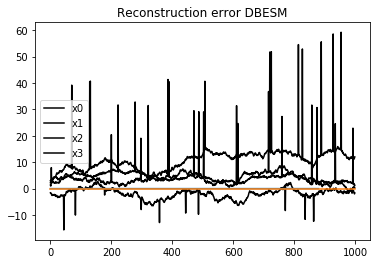

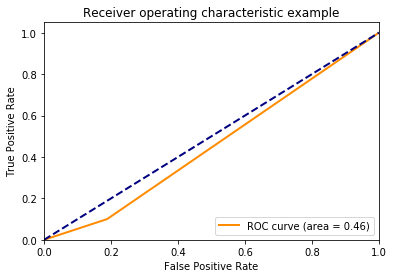

    name  accuracy  precision  recall  F1-score
0  Donut  0.803632   0.006061     0.1  0.011429


In [15]:
data_generator = synthetic_data_generator()
X_train, y_train, X_test, y_test = data_generator.generate_outliers("extreme")

y_predictions = [] # predicted binary labels of all models

working_models = ["ReEBM"]
ReEBM = RecurrentEBM(num_epochs=100)
ReEBM.fit(X_train, None)
pred = ReEBM.predict(X_test)
y_predictions.append(binary_label(pred))
plot_DBESM_errors(X_test, pred)
evaluate(y_test, y_predictions, working_models)

y_predictions = []
working_models = ["DAGMM"]
dagmm = DAGMM()
dagmm.fit(X_train.values, y_train)
pred = dagmm.predict(X_test)
y_predictions.append(pred)
evaluate(y_test, y_predictions, working_models)

y_predictions = []
working_models = ["Donut"]
donut = Donut()
donut.fit(X_train, np.zeros(len(X_train)), feature_col_idx=0)
y_pred = donut.predict(X_test)
y_pred_clean = y_pred[~np.isnan(y_pred)]  # Drop nan's
y_test_clean = y_test[~np.isnan(y_pred)]
y_predictions.append(binary_label(y_pred_clean))
plot_DBESM_errors(X_test, y_pred_clean)
evaluate(y_test_clean.values, y_predictions, working_models)